## TF-IDF

### What is TF-IDF?
TF stands for Term Frequency and denotes the ratio of number of times a particular word appeared in a Document to total number of words in the document.

* Term Frequency(TF) = [number of times word appeared / total no of words in a document]

Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.

* IDF stands for Inverse Document Frequency and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

* Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]

* In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0.

Finally:

* TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [2]:
#let's create the vectorizer and fit the corpus and transform them accordingly

v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)


In [3]:
dir(v)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_params',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_tfidf',
 '_validate_data',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 

In [6]:
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [8]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    
    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)
    
    #get the score
    idf_score = v.idf_[indx]
    
    print(f"{word} : {idf_score}")

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2.386294361119891
thor : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


In [9]:
#let's print the transformed output from tf-idf
print(transform_output.toarray())

[[0.24266547 0.         0.         0.         0.         0.
  0.         0.24266547 0.         0.         0.40286636 0.
  0.         0.         0.         0.24266547 0.11527033 0.24266547
  0.         0.         0.         0.         0.72799642 0.
  0.         0.24266547 0.         0.        ]
 [0.         0.         0.         0.         0.30652086 0.5680354
  0.         0.         0.         0.         0.         0.
  0.         0.         0.5680354  0.         0.26982671 0.
  0.         0.         0.30652086 0.         0.         0.
  0.         0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.26982671 0.
  0.         0.5680354  0.30652086 0.         0.         0.
  0.5680354  0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.

### Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories
Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

This data consists of two columns.

In [10]:
import pandas as pd

#read the data into a pandas dataframe
df = pd.read_csv("Ecommerce_data.csv")
print(df.shape)
df.head(5)

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [11]:
df['label'].value_counts()

Clothing & Accessories    6000
Household                 6000
Books                     6000
Electronics               6000
Name: label, dtype: int64

In [12]:
label_map = {"Clothing & Accessories": 0, "Household": 1, "Books": 2, "Electronics": 3}
df['label_num'] = df['label'].map(label_map)

In [13]:
df

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,1
1,"Contrast living Wooden Decorative Box,Painted ...",Household,1
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,3
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,0
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,0
...,...,...,...
23995,Marvel Physics MCQ's for MHT - CET,Books,2
23996,Internet Download Manager | Lifetime License |...,Books,2
23997,Sadhubela's Handcrafted Iron Degchi Handi Pot ...,Household,1
23998,Audio-Technica AT-LP60 Automatic Belt Driven D...,Electronics,3


### Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [14]:
!python -m spacy download en_core_web_lg  --quiet

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [15]:
#load english language model and create an object from it
import spacy
nlp = spacy.load("en_core_web_lg")

In [16]:
def preprocess(text):
    filtered_tokens = []
    doc = nlp(text)
    for tok in doc:
        if tok.is_stop or tok.is_punct:
            continue
        filtered_tokens.append(tok.lemma_)
    
    return " ".join(filtered_tokens)
        

In [17]:
preprocess("Loki is eating pizza at Chandrettan chayakkada")

'Loki eat pizza Chandrettan chayakkada'

In [18]:
df

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,1
1,"Contrast living Wooden Decorative Box,Painted ...",Household,1
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,3
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,0
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,0
...,...,...,...
23995,Marvel Physics MCQ's for MHT - CET,Books,2
23996,Internet Download Manager | Lifetime License |...,Books,2
23997,Sadhubela's Handcrafted Iron Degchi Handi Pot ...,Household,1
23998,Audio-Technica AT-LP60 Automatic Belt Driven D...,Electronics,3


In [24]:
df = df[:1000]
df['preprocessed_txt'] = df['Text'].apply(preprocess) 

In [25]:
df

,Text,label,label_num,preprocessed_txt
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,1,Urban Ladder Eisner Low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,1,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,3,IO Crest SY PCI40010 pci raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,0,ISAKAA Baby Socks bear 8 years- pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,0,Indira Designer Women Art Mysore Silk Saree Bl...
...,...,...,...,...
95,Angel's Beauty Amorza Underwear Women Panties ...,Clothing & Accessories,0,Angel Beauty Amorza Underwear Women Panties Se...
96,Mothercare Girls' Pyjama Set These bright and ...,Clothing & Accessories,0,Mothercare Girls Pyjama Set bright cute pyjama...
97,Friends Deal Fashion Women's Tafeta Silk Heavy...,Clothing & Accessories,0,friend Deal Fashion Women Tafeta Silk Heavy Em...
98,Mothercare Baby Girls' Sleepsuit (Pack of 3) T...,Clothing & Accessories,0,Mothercare Baby Girls Sleepsuit Pack 3 gorgeou...


In [26]:
df.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [27]:
df.preprocessed_txt[0]

'Urban Ladder Eisner Low Study Office Computer chair(black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

### Build a model with pre processed text

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [31]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.57      0.67      0.62         6
           2       0.80      1.00      0.89         4
           3       1.00      0.25      0.40         4

    accuracy                           0.75        20
   macro avg       0.81      0.73      0.71        20
weighted avg       0.79      0.75      0.72        20



### Plot confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[6, 0, 0, 0],
       [1, 4, 1, 0],
       [0, 0, 4, 0],
       [0, 3, 0, 1]], dtype=int64)

Text(69.0, 0.5, 'Truth')

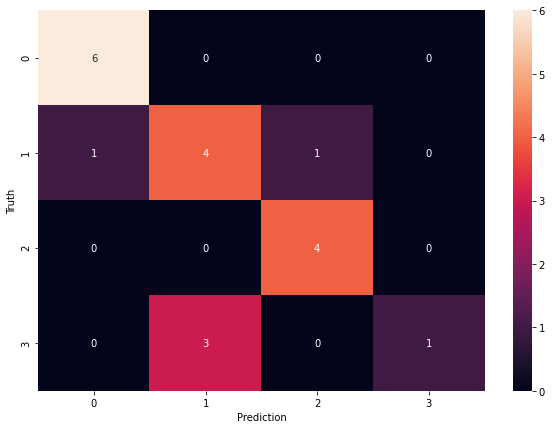

In [33]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')